In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('timesData.csv')
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [3]:
df.reset_index(inplace=True)
df.head()

,index,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [132]:
top100 = df.iloc[:100,:]
trace1 = go.Scatter(
                    x = top100.index,
                    y = top100.citations,
                    mode = 'lines',
                    name = 'citations',
                    marker = dict(color = 'lightgreen'),
                    text = 'World Rank: ' + top100['world_rank'].astype(str) + '<br>University Name: ' + top100['university_name'].astype(str))
trace2 = go.Scatter(
                    x = top100.index,
                    y = top100.teaching,
                    mode = 'lines+markers',
                    name = 'teaching',
                    marker = dict(color = 'blueviolet'),
                    text = 'World Rank: ' + top100['world_rank'].astype(str) + '<br>University Name: ' + top100['university_name'].astype(str))

data = [trace1,trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'Index - Ordered by World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Next, we can plot the ratios of female to male students. We first need to convert the ratios to percentages:

In [12]:
df_male_female = df.copy()

df_male_female = df_male_female[df_male_female['female_male_ratio'].notna()]
df_male_female['percent_female'] = np.where(df_male_female['female_male_ratio']!='-', df_male_female['female_male_ratio'].str[:2],np.nan)
df_male_female['percent_male'] = np.where(df_male_female['female_male_ratio']!='-', df_male_female['female_male_ratio'].str[-2:],np.nan)

df_male_female = df_male_female[(df_male_female['percent_female'].notna())&(df_male_female['percent_male'].notna())]
df_male_female['percent_female'] = df_male_female['percent_female'].astype(float)
df_male_female['percent_male'] = df_male_female['percent_male'].astype(float)

df_male_female.reset_index(drop=True,inplace=True)
df_male_female.reset_index(inplace=True)

In [14]:
df_male_female = df_male_female.iloc[:60,:]
df_male_female['world_rank'] = df_male_female['world_rank'].astype(int)
top50_mf = df_male_female[df_male_female['world_rank']<51]

bar = px.bar(top50_mf,
             x='university_name', 
             y=['percent_female','percent_male'], 
             title='Percent of Male and Female Students in Top 50 Universities',
             text='world_rank',
             labels={'value':'Percent','university_name':'Name of University'},
             color_discrete_map={'percent_female': 'lightpink','percent_male': 'powderblue'},
             width=1000, height=800)
bar.update_layout( xaxis = dict( tickfont = dict(size=8)))
bar.show()

Now, let's plot the number of students for each university (only doing the top 10 here). First, we'll have to convert the datatype of num_students to an integer.

In [141]:
df_numstu = df.copy()

df_numstu = df_numstu[df_numstu['num_students'].notna()]

df_numstu['num_students'] = df_numstu['num_students'].str.replace(',','')
df_numstu['num_students'] = df_numstu['num_students'].astype(int)

top10_stu = df_numstu.iloc[:10,:]

bar = px.bar(top10_stu,
             x='university_name', 
             y='num_students', 
             title='Number of Students Among Top 10 Universities',
             text='world_rank',
             labels={'num_students':'# Students','university_name':'Name of University'},
             color = 'num_students',
             color_continuous_scale='Burg')
bar.update_layout( xaxis = dict( tickfont = dict(size=8)))
bar.show()

Creating a wordcloud of most frequent universities:

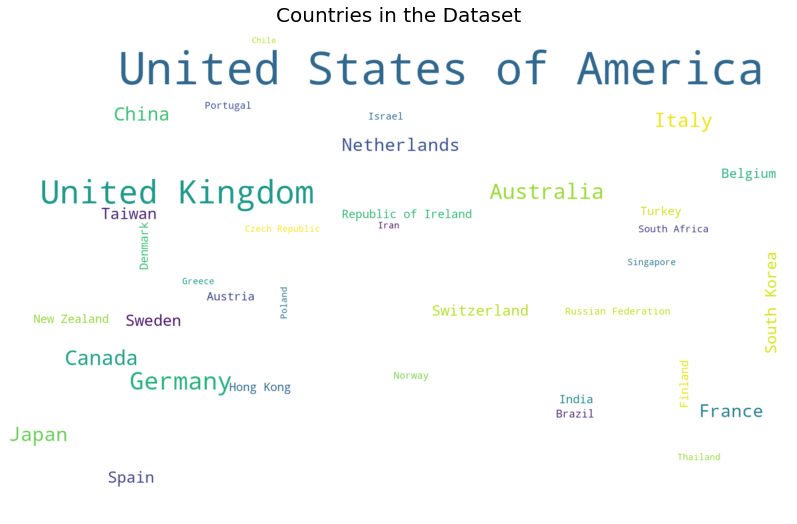

In [144]:
country_freq_dict = {}
for country in df['country'].unique():
  country_df = df[df['country']==country]
  country_freq_dict[country] = country_df.shape[0]

wordcloud = WordCloud(width=800,height=500, 
                      background_color='white',
                      scale=2,
                      min_font_size=8).generate_from_frequencies(country_freq_dict)
plt.figure(figsize=(18,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Countries in the Dataset',fontsize=20)
plt.show()

In [145]:
df_c = df[df['country'].notna()]
countries = df_c.groupby('country').size().reset_index(name='count')
countries = countries[countries['count']>50].sort_values(by='count',ascending=False)

bar = px.bar(countries,
             x='country', 
             y='count', 
             title='Number of Universities Among Countries with Over 50 Universities',
             labels={'count':'Number of Universities','country':'Country'},
             color = 'count',
             color_continuous_scale='Burg')
bar.update_layout( xaxis = dict( tickfont = dict(size=10)))
bar.show()

In [79]:
df_scores = df[(df['total_score'].notna())&(df['total_score']!='-')&(df['year']==2011)]
df_scores['total_score'] = df_scores['total_score'].astype(float)
df_scores.sort_values(by='total_score', ascending=False, inplace=True)
df_scores.reset_index(drop=True,inplace=True)
df_scores.reset_index(inplace=True)


df_toplot = df_scores.iloc[:100,:]
fig = px.line(df_scores, x='level_0', y='total_score', 
              title='Total Scores for Universities for 2011',
              labels={'level_0':'Index of University - Ordered by Total Score',
                      'total_score':'Total Score',
                      'world_rank':'World Rank'},
              hover_data=['world_rank'])
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



If you hover over the line in the above plot, you can see the university name and the world rank. Now, we can make a scatter plot looking at the other years

In [84]:
#df2011 = df[df['year']==2011]

years = df.year.unique()[1:]
to_trace=[]
for yr in years:
  yearly_df = df[(df['year']==yr)&(df['total_score']!='-')&(df['total_score']!=np.nan)].iloc[:100,:]
  yearly_df['total_score'] = yearly_df['total_score'].astype(float)
  yearly_df['world_rank'] = np.where(yearly_df['world_rank'].str[0]=='=',yearly_df['world_rank'].str[1:],yearly_df['world_rank'])
  yearly_df['world_rank'] = yearly_df['world_rank'].astype(int)
  trace = go.Scatter(x=yearly_df['world_rank'],
                     y=yearly_df['total_score'],
                     mode='markers',
                     name=str(yr),
                     text=yearly_df['university_name'])
  to_trace.append(trace)

layout = dict(title = 'Total Score vs world rank of top 100 universities with other years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Total Score',ticklen= 5,zeroline= False)
             )

fig = dict(data = to_trace, layout = layout)
iplot(fig)

In [27]:
df_teach_research = df[(df['teaching']!='-')&(df['research']!='-')].iloc[:10,:]
df_teach_research = df_teach_research[['index','world_rank','university_name','teaching','research']]
df_teach_research['teaching'] = df_teach_research['teaching'].astype(float)
df_teach_research['research'] = df_teach_research['research'].astype(float)

df_tc_plt = pd.melt(df_teach_research, id_vars=['university_name'], value_vars=['teaching','research'])

bar = px.bar(df_tc_plt,
             x='university_name', 
             y='value', 
             title='Top 10 University Teaching and Research Scores',
             labels={'university_name':'University Name','value':'Score'},
             color = 'variable',
             barmode = 'group',
             color_continuous_scale='Burg',
             color_discrete_map={'teaching': 'maroon','research': 'palevioletred'})

bar.update_layout( xaxis = dict( tickfont = dict(size=10)))
bar.show()